# Muhold keringesenek vizsgalata kozegellenallassal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# fontos allandok definialasa
gamma = 6.67e-11
M_Fold = 5.972e24
R_Fold = 6378000.0

nap = 60 * 60 * 24 # nap secondum-ban, 1 nap 24 h -> 1 ora 60 m -> 1 perc 60 s
ev = 365.242195 * nap # ev secondum-ban

rho0 = 1.2
h0 = 10400.0
m = 83.6 # test tomege
C = 0.47
A = (0.58/2)**2 * np.pi


In [277]:
# egyszeru mozgas egyenlet megoldo
# xn: hely-ido, vn: seb-ido, m: tomeg, F: erofuggveny, dt: idopillanat
def lepes ( xn, vn, m, F, dt):
    a = F ( xn, vn, m ) / m
    v_new = dt * a + vn
    # print( (v_new**2).sum()**0.5 )
    x_new = dt * v_new + xn
    # print( (x_new**2).sum()**0.5 - R_Fold )
    return ( x_new, v_new )

In [278]:
# Erofuggveny xyz koordinatakkal (3D ben)

def rho( h ):
    # print ( h )
    return ( rho0 * np.exp( -h / h0 ) )

def F_kozeg( c, a, rho, v): # kozegellenallas nagy sebessegnel
    v_abs = ( v**2 ).sum()**0.5
    # print(rho)
    f_kozeg = ( -(1/2) * c * a * rho * v**2 )
    # print( f_kozeg )
    return ( f_kozeg )
    
M = M_Fold # a gravitacios erofuggvenyt hasznaljuk, ehhez a fold tomege kell nekunk

def F_grav( r, v, m ): # r: origotol vett tavolsag
    r_abs = ( r**2 ).sum()**0.5 # r hossza / nagysaga
    f_grav = -gamma * M * m * r / r_abs**3
    return ( f_grav )


def F_grav_kozeg(r, v, m): # grav kozegellenallassal
    f_grav = F_grav(r, v, m)
    f_kozeg = F_kozeg( C, A, rho( (r**2).sum()**0.5 - R_Fold ), v)
    f_grav_kozeg = f_grav + f_kozeg
    print ("Gravitacio: x = %.2f y = %.2f z = %.2f\tKozegellenallas: x = %.6f y = %.2f z = %.6f"%(f_grav[0], f_grav[2], f_grav[1], f_kozeg[0], f_kozeg[2], f_kozeg[1]) )
    return ( f_grav_kozeg )

### Becsapodas vizsgalat

In [279]:
h_start = 200.0 * 1000.0 # kezdo magassag fold felszinetol szamitva
v_start = 7200.0 # kezdosebesseg

# r0 es v0 vectorkent
r0 = np.array([R_Fold+h_start, 0.0, 0.0], np.float64) # kezdo hely
v0 = np.array([0.0, v_start, 0.0], np.float64) # kezdo sebesseg

dt = 10.0# idolepes

r = r0
v = v0

K = 0.0

t = 0.0 # t0 ido 
t_max = 1.0 * nap

In [280]:

t_list= np.arange(t, t_max, dt)
r_list= []
v_list= []

becsapodas=False
while (t<=t_max+1e-6):   # r[2]>0: még nem esett le!
    t_list.append(t)
    v_list.append(v)
    r_list.append(r)
    r_abs=(r**2).sum()**0.5
    if r_abs<R_Fold:   # becsapódtunk
        becsapodas=True
        break
              
    r, v = lepes(r, v, m, F_grav, dt)
    t += dt
    
# tömbbé alakítjuk
r_arr=np.asarray(r_list)
v_arr=np.asarray(v_list)


Text(0, 0.5, 'z')

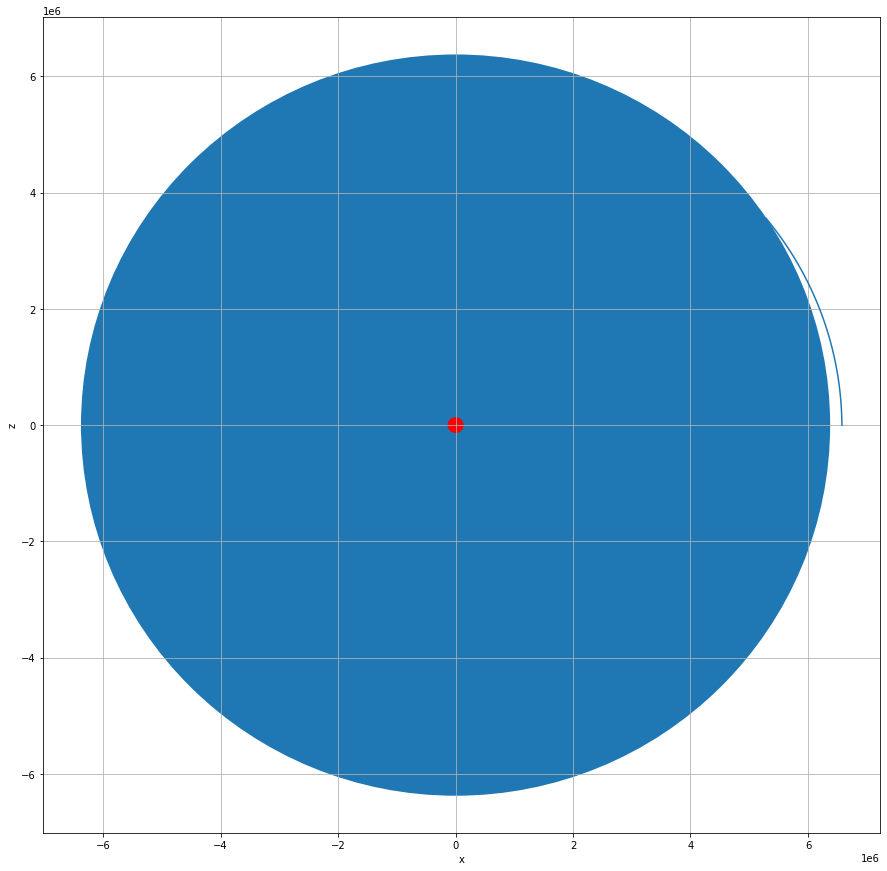

In [281]:
# kiplottoljuk az ertekeket
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
ax1.plot(r_arr[:, 0], r_arr[:, 1])

circ = plt.Circle((0,0), R_Fold)
kp = plt.Circle((0,0), R_Fold/50.0, color="red")
ax1.add_patch(circ)
ax1.add_patch(kp)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('z')

In [282]:
if becsapodas:
    print("A műhold a vizsgált időszakban becsapódott a felszínbe!")
    print("t=%.02f s nap=%.002f"%(t, t/nap))
    print("v=%.02f m/s"%((v_arr[-1,:]**2).sum()**0.5))
else:
    print("A műhold a vizsgált időszakban nem csapódott be a felszínbe!")

A műhold a vizsgált időszakban becsapódott a felszínbe!
t=530.00 s nap=0.01
v=7462.40 m/s


Text(0, 0.5, 'v_xyz(t)')

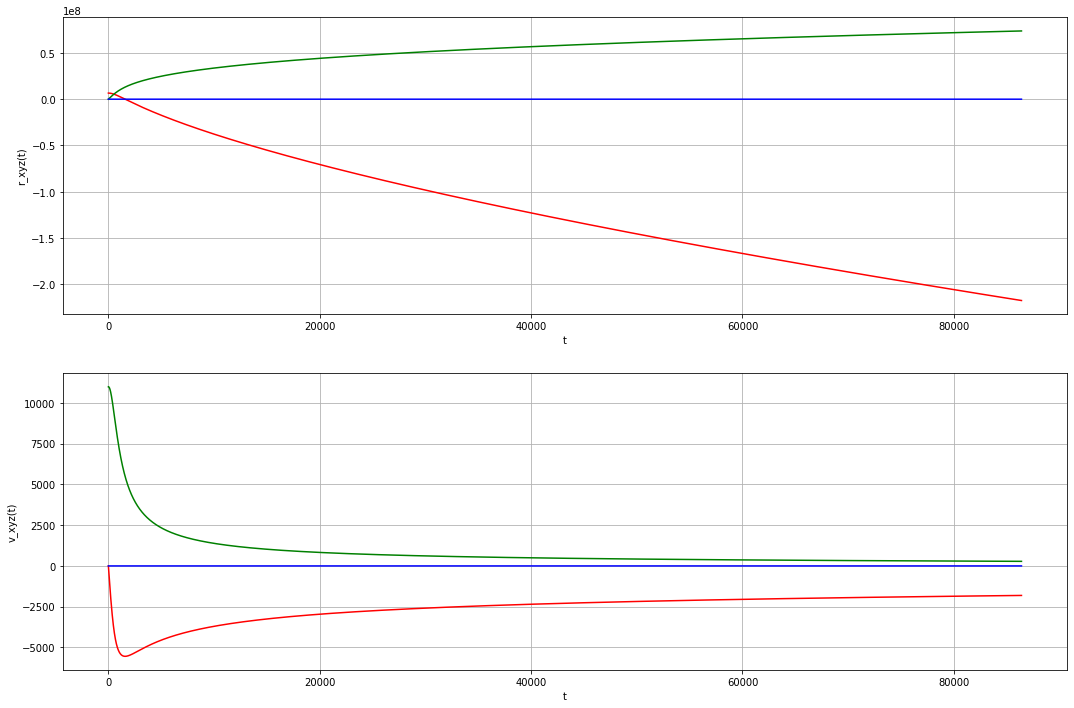

In [259]:
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, r_arr[:,0], color="red") # rx(t)
ax1.plot(t_list, r_arr[:,1], color="green") # rz(t)
ax1.plot(t_list, r_arr[:,2], color="blue") # ry(t)
ax2.plot(t_list, v_arr[:,0], color="red") # vx(t)
ax2.plot(t_list, v_arr[:,1], color="green") # vz(t)
ax2.plot(t_list, v_arr[:,2], color="blue") # vy(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("r_xyz(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_xyz(t)")